# Signals Processing Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

### Exercise

Generate a 10-second random signal with 0.01 second sampling interval and plot it. (Tip: you should use [np.random.random()](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) function)

Is the signal continuous or discrete?  Analog or digital?

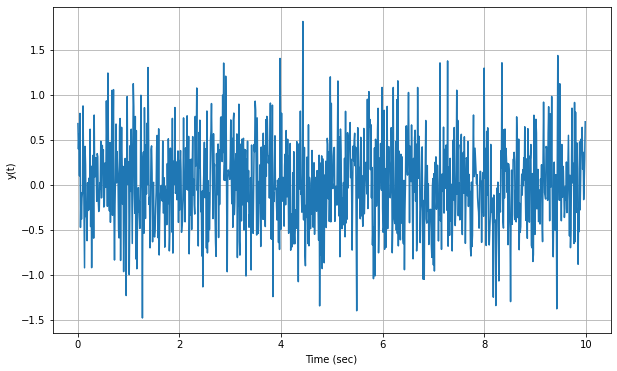

In [2]:
# write code here

n_sec = 10                          # number of seconds to plot
n_points = 100                      # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time axis
y_rand = np.random.normal(scale=0.5, size=len(t))

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t, y_rand)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()

Answer: The signal is discrete and digital. Any signal comprised of finite number of samples is discrete. And because signal values are stored in a finite number of bits, their magnitudes can only assume a finite set of possible values.

### ECG Example
The file ecg.txt contains 15000 data points of ECG data, sampled at 1000 Hz.  Plot the signal with appropriate time axis.

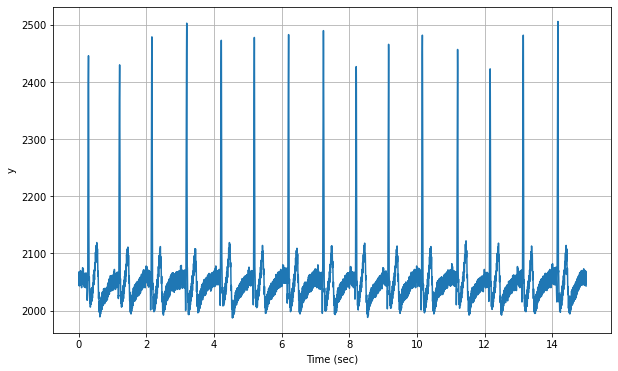

In [3]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url,skiprows=4)

# write code here

n_points = len(ecg_microvolts)
f = 1000.
n_sec = n_points/f
t = np.arange(0, n_points)/f

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t, ecg_microvolts)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

__Question__

Estimate frequency and amplitude of the above ECG signal (NOT using code!)

__Answer__

Frequency: ~1 Hz, amplitude: ~2500 (microvolts)

__Exercise__

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

(-2.0, 2.0)

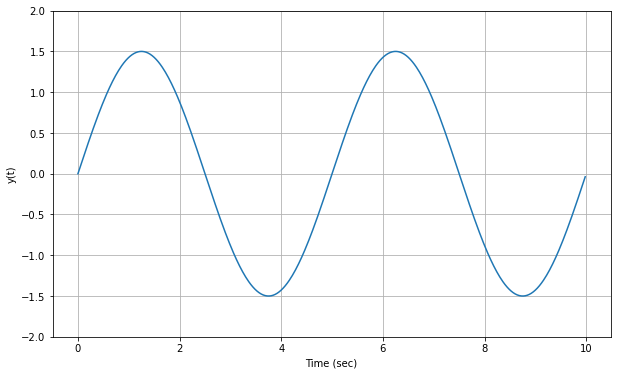

In [4]:
# write code here

n_sec = 10                        # number of seconds to plot
n_points = 50                     # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time axis

a = 1.5                           # amplitude
f = 0.2                           # oscillations per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                           # phase

y = a*np.sin(omega*t + phi)       # sinusoid

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Exercise__

Consider the signal shown below (the sum of two sinusoids) for this question. How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

(-2.0, 2.0)

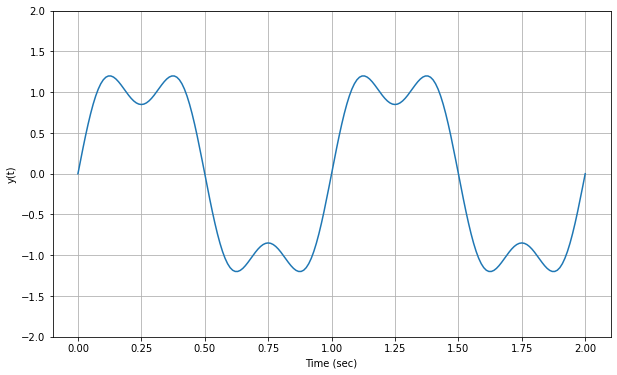

In [5]:
t = np.linspace(0,2,201)
y = (4/np.pi)*np.sin(2*np.pi*t) + (4/(3*np.pi))*np.sin(6*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Answer__

You need 6 points. The frequencies are 1 Hz and 3 Hz.

__Exercise__

Plot the peaks from the ECG signal. You can take a look at scipy.signal's documentation for [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks)

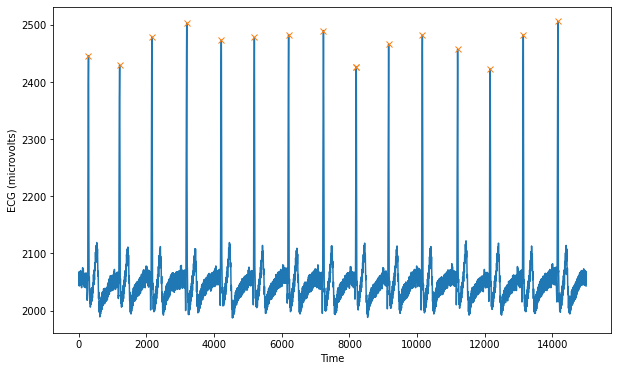

In [6]:
# write code here
from scipy.signal import find_peaks

# Try the height parameter (pretty self explanatory) first and then play around with the distance
peaks, _ = find_peaks(ecg_microvolts, height = 2300)
# peaks, _ = find_peaks(y, distance=900)
plt.figure(figsize=(10,6))
plt.xlabel('Time')
plt.ylabel('ECG (microvolts)')
plt.plot(ecg_microvolts)
plt.plot(peaks, ecg_microvolts[peaks], "x")
plt.show()

__Exercise__

1. Generate 5 sine waves with frequencies and amplitudes set based on two user-defined lists and sum them into one signal.
2. Plot the 5 original sine waves and the combined signal.
3. Plot x markers at the peaks of the waves using find_peaks

Text(0, 0.5, 'Arbitrary')

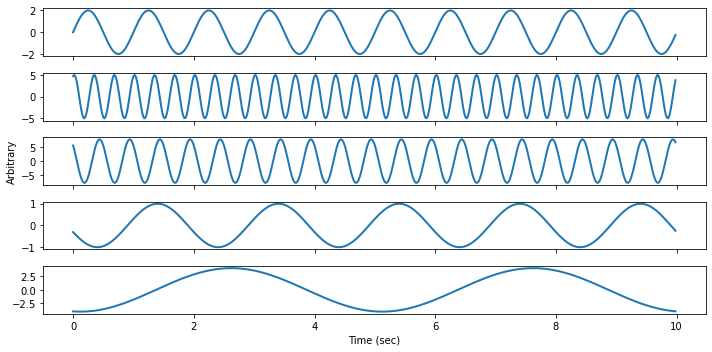

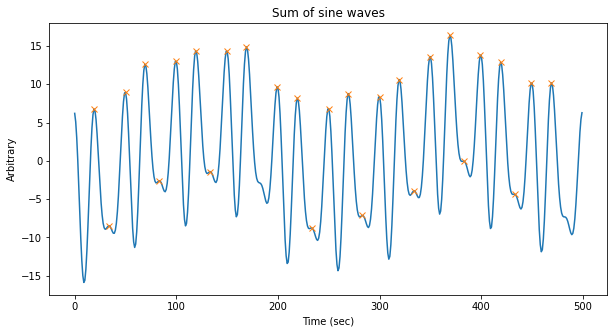

In [7]:
## write code here
n_sec = 10      # (s) Generate 10 seconds worth of data
f_samp = 50     # (Hz) Generate 50 samples per second

# List the amplitudes, frequencies, and phases of these waves
amps = [2, 5, 8, 1, 4]
freqs = [1, 3, 2, 0.5, 0.2]
phis = [0.00, 1.23, 2.34, 3.45, 4.56]

# Generate the time-stamps to sample
t = np.arange(n_sec*f_samp)/f_samp

# Generate each of the five woves
waves = []
for amp, freq, phi in zip(amps, freqs, phis):
    waves.append(amp*np.sin((2*np.pi*freq*t)+phi))
waves = np.array(waves)

# Plot each of the generated waves
fig, ax_arr = plt.subplots(nrows=len(waves), ncols=1, figsize=(10,5), sharex=True)
for ax, wave in zip(ax_arr, waves):
    ax.plot(t, wave, linewidth=2)

# Add axis labels and clean up the layout
ax_arr[2].set_ylabel('Arbitrary')
ax_arr[-1].set_xlabel('Time (sec)')
plt.tight_layout()

# Add all of the waves together and plot the combined waveform
combined = np.sum(waves, axis=0)
plt.figure(figsize=(10,5))
plt.plot(combined)
plt.title("Sum of sine waves")

# Locate and mark the peaks
peaks, _ = find_peaks(combined)
plt.plot(peaks, combined[peaks], "x")
plt.xlabel('Time (sec)')
plt.ylabel('Arbitrary')